## Jupyter Notebook–Measure the Bar Length and PA of MaNGA Galaxies
### This notebook was created by Rachel Langgin, Bryn Mawr College, under the advisement of Professor Karen Masters, Haverford College, in the spring of 2022. 
### The goal of this notebook was to create a function that requires a MaNGA ID and a bar threshold value as arguments in order to return a plot of effective radius vs. modified position angle, CSV file and dataframe with the following columns: MaNGA_ID, Position_Angle, Bar_Length, Reff, and Threshold.  

The following cell contains the import modules required, including using the most recent Marvin update as the DR17. 

In [98]:
# import the dr17 through marvin updated method
import marvin
marvin.config.download = True
marvin.config.release = 'DR17'
from marvin.tools.maps import Maps
from marvin.tools import Cube

from marvin import config
config.forceDbOff()

# import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import astropy.wcs as wcs
import pandas as pd

# import astropy fits
from astropy.io import fits

# to plot in notebook using special style
%matplotlib inline
#Plotting defaults (by Coleman Krawcyzk) in a file called coleman_style.py (not essential) but located in this same directory
#import coleman_style

# this can usually be run twice to get rid of the warnings
print('Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned')

Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned


The next cell defines the function that takes a MaNGA ID of a galaxy as an argument to return the PA and Bar Length. It is commented for clarity. 

In [120]:
'''
A function that takes a Manga-ID as an argument and returns a dataframe with the Manga-ID, the PA, & the Bar Length.
Based on code by Rachel Langgin.

Input: MaNGAID and the threshold which counts as bar. 
threshold=7 and threshold=3 are common.
'''
def PAandLength(manga_id,threshold): # Define the function as PAandLength that requires the MaNGA_ID and bar threshold
    map = Maps(manga_id) # Using Marvin's map feature to download the galaxy data based on the corresponding MaNGA_ID
    data = map.vacs.gz3d # Define the data using gz3d vacs  
    
    # Select threshold based on the input threshold value
    barthreshold = data.bar_mask_spaxel > threshold 
    
    # Define variables–
    
    # Radius: 
    r = data.maps['spx_ellcoo_elliptical_radius'].value # Radius value in arcseconds
    reff = data.maps.header['reff'] # Effective radius 
    r_plot = r / reff # (r'R / R$_{\rm eff}$')
    
    #Azimuth Theta Value:
    theta = data.maps['spx_ellcoo_elliptical_azimuth'].value # Azimuth value of spaxels
    
    # Select only bar spaxels
    sel = barthreshold
    
    # Create an if statement that will fill the PA and Bar_Length values with -999 if there are no spaxels to select
    if len(r_plot[sel]) == 0: 
        PAavg= -999
        bar_length= -999 
    # Else, if there are spaxels to select then the following code calculates the PA and Bar_Length as follows:
    else:
    
        # Select the endpoints of the bar
        endpoint1 = np.max(r_plot[sel]) # the max
        endpoint2 = np.min(r_plot[sel]) # the min 
    
        # Subtract the max from the min to get the bar length     
        bar_length = 2*(endpoint1) # Subtract the max from the min to get the bar length     
    
        # Create a PA plot to check if the PA
        thetaplot=theta[sel] # all of the angles within the bar
        thetanorm=thetaplot[np.where(endpoint1)] # index where the maximum endpoint of the bar 
        thetaout= (thetaplot-thetanorm) % 180 # Modify the theta values so that where the values are
        # lower than 90, add 180 degrees and where the values are greater than 270, subtract 180 degrees
        
        # Take the PA average of the values after considering wrapping and add thetanorm back
        PAavg=(np.mean(thetaout))+thetanorm 
        
        # Plot of bar radius against the modified PA values
        plt.plot(r_plot[sel],thetaplot,'.')
        plt.xlabel("Effective Radius, Reff (arcseconds)")
        plt.ylabel("Modified Position Angle, Theta (Degrees)")
        plt.title("Reff vs. Theta")
    
    # Define a DF table of parameters we want:
    newcols = {'MaNGA_ID':[manga_id], 'Position_Angle':[PAavg], 'Bar_Length':[bar_length], 'Reff':[reff], 'Threshold':[threshold]} # create a df table
    newtable = pd.DataFrame(data=newcols) 
    
    return(newtable) # Return the new df table with the pa and bar length with the corresponding manga-id

#### Test the function on one MaNGA_ID and a typical threshold value:

,MaNGA_ID,Position_Angle,Bar_Length,Reff,Threshold
0,1-604761,[210.14331],1.083926,14.071,7


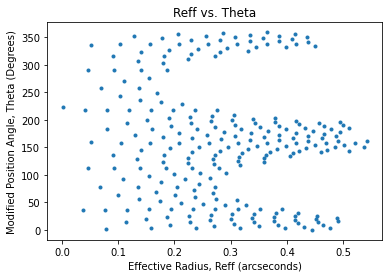

In [121]:
PAandLength('1-604761',7)

#### Test the function on one MaNGA_ID with a lower threshold value:

,MaNGA_ID,Position_Angle,Bar_Length,Reff,Threshold
0,1-1038,[250.7134],1.925058,6.31712,3


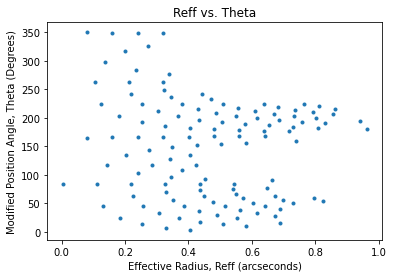

In [117]:
PAandLength('1-1038', 3) # threshold of 6 fails, threshold of 6.5 fails, threshold of 7 fails
# Threshold value of 3 works successfully. 

Next, we define a table of 417 MaNGA_IDs to use. 

In [105]:
# Define a table of 417 MaNGA_IDs to test the function on a large amount of data
mangaid_fits_table = '/Users/rachellanggin/mangaids.fits'
hdul = fits.open(mangaid_fits_table)
data1 = hdul[1].data

[WARNING]: unclosed file <_io.FileIO name='/Users/rachellanggin/mangaids.fits' mode='rb' closefd=True> (ResourceWarning)


In [104]:
# Check mangaid table
mangaid = data1.field(0)
print(mangaid)
len(mangaid)

['1-250959' '1-178601' '1-94720' '1-272819' '1-456655' '1-633990'
 '1-79916' '1-95585' '1-1038' '1-41531' '1-604875' '1-634800' '1-456341'
 '1-591101' '1-24416' '1-458301' '1-295183' '1-22810' '1-606105' '1-79648'
 '1-247675' '1-92763' '1-45470' '1-335446' '1-286277' '1-284048'
 '1-120872' '1-34149' '1-419536' '1-209287' '1-416039' '1-296681'
 '1-401640' '1-532459' '1-605282' '1-250894' '1-79770' '1-605026'
 '1-177061' '1-603039' '1-456643' '1-594452' '1-446650' '1-67044'
 '1-145806' '1-122203' '1-464264' '1-31996' '1-622911' '1-198233'
 '1-626395' '1-29571' '1-148985' '1-37084' '1-256293' '1-256203'
 '1-419022' '1-94422' '1-248420' '1-24661' '1-564535' '1-217210' '1-41762'
 '1-230042' '1-248634' '1-195761' '1-489927' '1-47291' '1-42896'
 '1-590252' '1-61557' '1-44618' '1-44172' '1-135535' '1-294537' '1-626483'
 '1-456391' '1-458209' '1-72207' '1-394046' '1-576051' '1-605691'
 '1-26406' '1-273477' '1-585641' '1-488469' '1-386733' '1-313385'
 '1-24660' '1-384848' '1-194947' '1-135742' '

417

### The following code is a loop using the function above. The loop creates an error list for failed MaNGA_IDs to be appended to as the loop runs. It begins with a counter and with print statements that corresponds to the galaxy that the loop is working on. The two if statements in the loop then correspond with the counter to run the function on the MaNGA_ID in the list above with two threshold values; one at 7 and the other at 3. The loop ultimately concats the data into a dataframe and then into a CSV that is saved to the specified pathway. 

Working on n= 0
Working on n= 1
Working on n= 2
Working on n= 3
Working on n= 4
Working on n= 5
Working on n= 6
Working on n= 7
Working on n= 8
Working on n= 9
Working on n= 10
Working on n= 11
Working on n= 12
Working on n= 13
Working on n= 14
Working on n= 15
Working on n= 16
Working on n= 17
Working on n= 18
Working on n= 19
Working on n= 20
Working on n= 21
Working on n= 22
Working on n= 23
Working on n= 24
Working on n= 25
Working on n= 26
Working on n= 27
Working on n= 28
Working on n= 29
Working on n= 30
Working on n= 31
Working on n= 32
Working on n= 33
Working on n= 34
Working on n= 35
Working on n= 36
Working on n= 37
Working on n= 38
Working on n= 39
Working on n= 40
Working on n= 41
Working on n= 42
Working on n= 43
Working on n= 44
Working on n= 45
Working on n= 46
Working on n= 47
Working on n= 48
Working on n= 49
Working on n= 50
Working on n= 51
Working on n= 52
Working on n= 53
Working on n= 54
Working on n= 55
Working on n= 56
Working on n= 57
Working on n= 58
Working

Working on n= 462
Working on n= 463
Working on n= 464
Working on n= 465
Working on n= 466
Working on n= 467
Working on n= 468
Working on n= 469
Working on n= 470
Working on n= 471
Working on n= 472
Working on n= 473
Working on n= 474
Working on n= 475
Working on n= 476
Working on n= 477
Working on n= 478
Working on n= 479
Working on n= 480
Working on n= 481
Working on n= 482
Working on n= 483
Working on n= 484
Working on n= 485
Working on n= 486
Working on n= 487
Working on n= 488
Working on n= 489
Working on n= 490
Working on n= 491
Working on n= 492
Working on n= 493
Working on n= 494
Working on n= 495
Working on n= 496
Working on n= 497
Working on n= 498
Working on n= 499
Working on n= 500
Working on n= 501
Working on n= 502
Working on n= 503
Working on n= 504
Working on n= 505
Working on n= 506
Working on n= 507
Working on n= 508
Working on n= 509
Working on n= 510
Working on n= 511
Working on n= 512
Working on n= 513
Working on n= 514
Working on n= 515
Working on n= 516
Working on

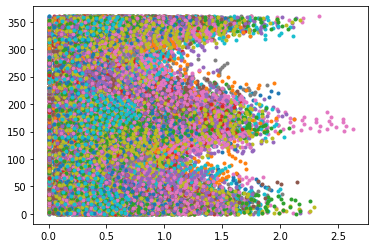

In [27]:
'''A for loop that runs the function on each MaNGA_ID from the list above. The runtime is vastly improved 
if the GZ3d files of the galaxies are already downloaded on the server.'''
error_list = [] # Create an error list to append failed IDs to
n = 0 # Begin the counter at n = 0
for i in mangaid: # For loop of each MaNGA_ID from the list above
    try: 
        print("Working on n=", n) # Print which galaxy the loop is working on
        if n==0: mangaid=PAandLength(i, 7) # If the counter is working, then run the code on the IDs with a threshold
            # value of 7
        n = n + 1  # Continue the counter
        if n>0: # Once the loop is ready to move onto the next galaxy, concat the data into a pandas dataframe
            mangaid = pd.concat([mangaid, PAandLength(i, 7)], ignore_index= True)
        # Write a CSV file of the defined dataframe in the previous line to a specified pathway
        fileout1 = mangaid.to_csv('/Users/rachellanggin/PAandBarLength.csv', columns=['MaNGA_ID', 'Position_Angle', 'Bar_Length', 'Reff', 'Threshold'], header=True, index=True)
            
        print("Working on n=", n) # Print which galaxy the loop is working on 
        if n==0: mangaid=PAandLength(i, 3) # If the counter is working, then run the code on the IDs again with 
        # a threshold value of 3
        n = n + 1  # Continue the counter
        if n>0: # Once the loop is ready to move onto the next galaxy, concat the same data into a pandas dataframe
            mangaid = pd.concat([mangaid, PAandLength(i, 3)], ignore_index= True)
        # Write a CSV file of the defined dataframe in the previous line to a specified pathway
        fileout2 = mangaid.to_csv('/Users/rachellanggin/PAandBarLength.csv', columns=['MaNGA_ID', 'Position_Angle', 'Bar_Length', 'Reff', 'Threshold'], header=True, index=True)
        
    except: # Finally, append the failed MaNGA_IDs to the error list
        error_list.append(mangaid)
        continue
print('Successful !!!') # Print "Successful !!!" once the loop is finish
print(error_list) # Print the errot list

In [106]:
datatable = fits.open('/Users/rachellanggin/PAandBarLength.fits')
datatable.info()
datatable[0].header

[WARNING]: unclosed file <_io.FileIO name='/Users/rachellanggin/PAandBarLength.fits' mode='rb' closefd=True> (ResourceWarning)


Filename: /Users/rachellanggin/PAandBarLength.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  /Users/rachellanggin/PAandBarLength.csv    1 BinTableHDU     24   833R x 6C   [I, 8A, 12A, D, D, I]   


SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    0 / No image, just extensions                      
EXTEND  =                    T / There are standard extensions                  
COMMENT Dummy header; see following table extension                             

In [107]:
# Copied failed IDs 
'''
[    MaNGA_ID Position_Angle  Bar_Length       Reff  Threshold
0   1-250959     [207.1579]    0.996403  10.028900          7
1   1-250959     [207.1579]    0.996403  10.028900          7
2   1-250959     [213.5133]    1.439276  10.028900          3
3   1-178601    [114.69525]    1.503754   7.830640          7
4   1-178601    [126.44057]    1.987430   7.830640          3
5    1-94720    [116.98227]    1.846270   7.070950          7
6    1-94720    [142.64177]    2.237788   7.070950          3
7   1-272819   [121.792244]    0.517692  14.024224          7
8   1-272819    [128.58206]    1.243397  14.024224          3
9   1-456655    [215.22862]    0.906598   9.279935          7
10  1-456655    [203.96622]    1.268019   9.279935          3
11  1-633990    [475.84875]    1.741668   8.186870          7
12  1-633990     [438.6343]    2.038822   8.186870          3
13   1-79916    [225.19162]    1.986233   5.518270          7
14   1-79916    [234.66568]    2.392815   5.518270          3
15   1-95585    [125.57768]    1.131975   9.045620          7
16   1-95585    [163.60773]    1.572595   9.045620          3
17    1-1038           -999 -999.000000   6.317120          7
18    1-1038     [250.7134]    1.925058   6.317120          3
19   1-41531   [117.012505]    1.184101   6.301160          7
20   1-41531    [102.60745]    3.224578   6.301160          3
21  1-604875           -999 -999.000000  12.677200          7
22  1-604875    [88.045105]    1.061261  12.677200          3]
'''

'\n[    MaNGA_ID Position_Angle  Bar_Length       Reff  Threshold\n0   1-250959     [207.1579]    0.996403  10.028900          7\n1   1-250959     [207.1579]    0.996403  10.028900          7\n2   1-250959     [213.5133]    1.439276  10.028900          3\n3   1-178601    [114.69525]    1.503754   7.830640          7\n4   1-178601    [126.44057]    1.987430   7.830640          3\n5    1-94720    [116.98227]    1.846270   7.070950          7\n6    1-94720    [142.64177]    2.237788   7.070950          3\n7   1-272819   [121.792244]    0.517692  14.024224          7\n8   1-272819    [128.58206]    1.243397  14.024224          3\n9   1-456655    [215.22862]    0.906598   9.279935          7\n10  1-456655    [203.96622]    1.268019   9.279935          3\n11  1-633990    [475.84875]    1.741668   8.186870          7\n12  1-633990     [438.6343]    2.038822   8.186870          3\n13   1-79916    [225.19162]    1.986233   5.518270          7\n14   1-79916    [234.66568]    2.392815   5.518270 

In [108]:
#for future reference 
bartable = fits.open('/Users/rachellanggin/BarLengths_ThresholdsTable_v5_updated.fits')
bartable.info()
bartable[0].header

[WARNING]: unclosed file <_io.FileIO name='/Users/rachellanggin/BarLengths_ThresholdsTable_v5_updated.fits' mode='rb' closefd=True> (ResourceWarning)


Filename: /Users/rachellanggin/BarLengths_ThresholdsTable_v5_updated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     16   447150R x 4C   [11A, K, D, D]   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

### The following cells of this notebook would continue using the data that the code above provides. My next steps with this notebook include:
* Comparing the data returned from the PAandLength Function with Dhanesh Krishnarao's data measurements using the same GZ3D masks, including– 
    - Matching the MaNGA_IDs from both datasets to only include the same MaNGA_IDs from each set. 
    - Creating a plot of Bar_Length vs. PA with each dataset.
    - Running correlation tests to see whether the two datasets have similar measurements for the same galaxy.

(array([ 9532., 10763.,  4339.,     0.,     0.,     0.,     0.,  4864.,
        10140.,  9251.]),
 array([-3.14159265, -2.51327412, -1.88495559, -1.25663706, -0.62831853,
         0.        ,  0.62831853,  1.25663706,  1.88495559,  2.51327412,
         3.14159265]),
 <BarContainer object of 10 artists>)

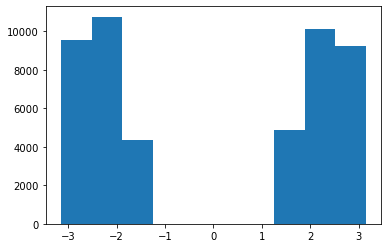

In [129]:
# Begin by reading in DK's Dataset
d = pd.read_csv('/Users/rachellanggin/BarLengths_ThresholdsTable_v5_updated.csv')
d = d.dropna() # Drop the NAN values from the set
d3 = np.where(d['THRESH'] == 3) # Find the indexes of where the threshold column is equal to 3
d # Show the dataframe
d[(d['THRESH'] == 3)]
plt.hist(d['BAR_ANGLE'])

In [110]:
# Read in the dataset created using the function above
r = pd.read_csv('/Users/rachellanggin/PAandBarLengths.csv') 
r # Show the dataframe

,col1,MaNGA_ID,Position_Angle,Bar_Length,Reff,Threshold
0,0,1-250959,[207.1579],0.996403,10.028900,7
1,1,1-250959,[207.1579],0.996403,10.028900,7
2,2,1-250959,[213.5133],1.439276,10.028900,3
3,3,1-178601,[114.69525],1.503754,7.830640,7
4,4,1-178601,[126.44057],1.987430,7.830640,3
...,...,...,...,...,...,...
828,828,1-195686,[110.4745],2.513994,4.997181,3
829,829,1-150343,[449.49033],2.003628,6.371125,7
830,830,1-150343,[456.21698],2.563997,6.371125,3
831,831,1-463969,-999,-999.000000,9.820470,7


(array([122.,  79.,  79.,  79.,  79.,  79.,  79.,  79.,  79.,  79.]),
 array([  0. ,  78.9, 157.8, 236.7, 315.6, 394.5, 473.4, 552.3, 631.2,
        710.1, 789. ]),
 <BarContainer object of 10 artists>)

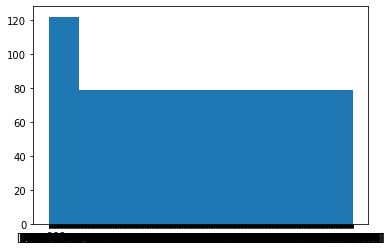

In [131]:
plt.hist(r['Position_Angle'])

In [111]:
r = r.iloc[:,1:] # Slice my dataframe to get rid of the repeated index column
r # Show the dataframe

,MaNGA_ID,Position_Angle,Bar_Length,Reff,Threshold
0,1-250959,[207.1579],0.996403,10.028900,7
1,1-250959,[207.1579],0.996403,10.028900,7
2,1-250959,[213.5133],1.439276,10.028900,3
3,1-178601,[114.69525],1.503754,7.830640,7
4,1-178601,[126.44057],1.987430,7.830640,3
...,...,...,...,...,...
828,1-195686,[110.4745],2.513994,4.997181,3
829,1-150343,[449.49033],2.003628,6.371125,7
830,1-150343,[456.21698],2.563997,6.371125,3
831,1-463969,-999,-999.000000,9.820470,7


The next step would be to find the matching MaNGA_ID's between mine and DK's datasets:

In [125]:
rid = r['MaNGA_ID']
did = d['MANGA_ID']
print(rid)
print(did)
#rid = did
#rid['ids_match'] = np.where(rid == did)

0      1-250959
1      1-250959
2      1-250959
3      1-178601
4      1-178601
         ...   
828    1-195686
829    1-150343
830    1-150343
831    1-463969
832    1-463969
Name: MaNGA_ID, Length: 833, dtype: object
135       1-623253
136       1-623253
137       1-623253
138       1-623253
139       1-623253
            ...   
446856     1-23746
446857     1-23746
446858     1-23746
446859     1-23746
446860     1-23746
Name: MANGA_ID, Length: 48889, dtype: object
